<a href="https://colab.research.google.com/github/eitanfass/Tomato_quality/blob/main/GRVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 3.8 MB/s 


In [11]:
import skimage.io as io # io is an input output moduile, as part of skimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from spectral import *
global wave_band_table,band_depth,R_wave,G_wave,B_wave
band_depth,R_wave,G_wave,B_wave=204,80,45,20
class SpectralImage():# class of spectral images
  
  def __init__(self,img_path,metadata=None,mask=None):
    self._load_img(img_path)#create spectral and RGB images

  def spectral_to_RGB(self, img):
    global R_wave,G_wave,B_wave
    self.RGB=np.zeros([img.shape[0],img.shape[0],3],dtype=float)# create tamplate for RGB

    #normalize pixel value to have max valiue of 1 an min value of 0 for each layer
    self.RGB[:,:,0]=(img[:,:,R_wave]-img[:,:,R_wave].min())/(img[:,:,R_wave].max()-img[:,:,R_wave].min())#red 
    self.RGB[:,:,1]=(img[:,:,G_wave]-img[:,:,G_wave].min())/(img[:,:,G_wave].max()-img[:,:,G_wave].min())#green
    self.RGB[:,:,2]=(img[:,:,B_wave]-img[:,:,B_wave].min())/(img[:,:,B_wave].max()-img[:,:,B_wave].min())#blue
    #TODO add save as jpeg
    return self.RGB
  
  def _load_img(self,img_path):#function that loads image using spectral library
    img = open_image(img_path)
    self.spectral=np.array(img.load())#read as np.array dims=[512,512,204](for specim iq images)
    self.spectral=np.rot90(self.spectral[:,:,:],3)#rotate (optional)
    self.RGB = self.spectral_to_RGB(self.spectral)#save an RGB vesion of the image

  def GRVI_index(self):
    global G_wave
    self.grvi=(self.spectral[:,:,100]/self.spectral[:,:,G_wave]*255).astype('uint8')


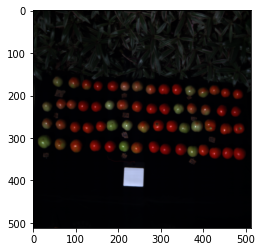

In [12]:
hdr_path='/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/HW04/images/results/REFLECTANCE_1452.hdr'
harvest_4_img=SpectralImage(hdr_path)
plt.imshow(harvest_4_img.RGB)
harvest_4_img.GRVI_index()

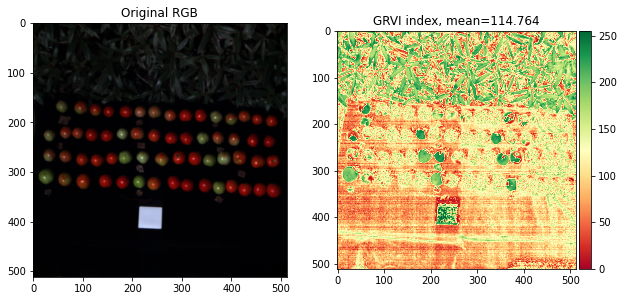

In [13]:
# define figure size: width 10 and height 15
plt.figure(figsize=(10, 15))

# subplot for the RGB
ax1 = plt.subplot(121, title='Original RGB')
im1 = ax1.imshow(harvest_4_img.RGB) 

# subplot for the index
ax2 = plt.subplot(122, title=f'GRVI index, mean={np.nanmean(harvest_4_img.grvi):.3f}') # notice the position, and the title
im2 = ax2.imshow(harvest_4_img.grvi,cmap='RdYlGn') 


# add colorbar only to the image on the right
divider = make_axes_locatable(ax2)
colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)  
plt.colorbar(im2, cax=colorbar_ax)
